K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

To run a k-means clustering:

- Specify the number of clusters you want (usually referred to as k).
- Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
- Determine which data points belong to which cluster by finding the closest centroid to each data point.
- Update the centroids based on the geometric mean of all the data points in the cluster.
- Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.

### Loading in and Cleaning FIFA data

In [1]:
import numpy as np 
import pandas as pd

In [2]:
players = pd.read_csv('players_22.csv')
players.head()

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_29686/2779277508.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
print(list(players.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

In [4]:
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. scale the data (all the values should be in the same range)
2. initialize random centroids
3. label each data points
4. update centroids
5. repeat steps 3 and 4 until centroids stops changing (the algorithm give us the final cluster)

MIN MAX scaling

In [7]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
# u can change the scale with all numbers

In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


initialize centroids

In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# this function generates k random centroids for k-means clustering by sampling random values from the given data for each feature,
# and then concatenates them into a DataFrame where each column represents a centroid.

In [11]:
centroids = random_centroids(data, 5)

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_29686/3441493350.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [12]:
centroids

,0,1,2,3,4
overall,5.130435,2.521739,4.913043,3.826087,5.565217
potential,6.434783,5.347826,6.869565,6.000000,5.565217
wage_eur,3.103004,1.557940,1.000000,1.014306,1.014306
value_eur,1.087169,1.056240,1.013712,1.021444,1.021444
age,8.037037,8.037037,9.148148,2.111111,3.222222


label each data points

In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# this function computes the Euclidean distance between each data point and each centroid, and then assigns a label to each data point based
# on the index of the closest centroid (i.e., the centroid with the minimum distance).

In [14]:
labels = get_labels(data, centroids)

In [15]:
labels.value_counts()

4    9977
3    5112
0    2247
1    1227
2     602
Name: count, dtype: int64

In [16]:
def new_centroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

#  this function calculates new centroids for each cluster based on the mean of the logarithm of data points in each cluster,
# and then returns these centroids as a DataFrame. However, it was missing the assignment of the calculated centroids to the centroids variable,
# which I've corrected in the provided code.

plotting k-means iterations

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
    
# this function uses PCA to reduce the dimensionality of the data to 2 dimensions, visualizes the data points with colors representing their assigned clusters,
# and plots the centroids as distinct points on the same plot. The title of the plot indicates the current iteration of the clustering algorithm.

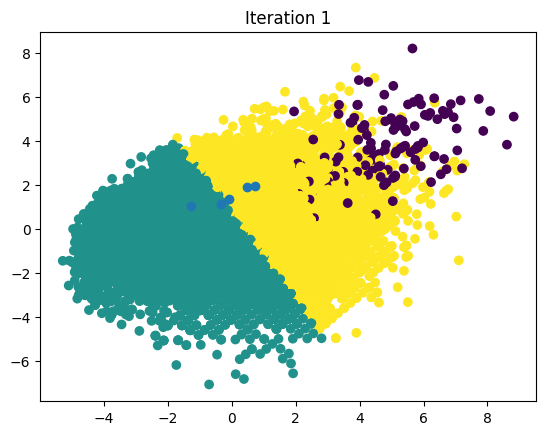

In [19]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    
#  this code performs k-means clustering on the given data by iteratively updating centroids until convergence or until the maximum number of iterations is reached.
# It visualizes the clusters and centroids at each iteration using the plot_clusters function.

In [20]:
centroids

,0,1,2,3,4
overall,8.391304,7.521739,5.565217,4.695652,6.217391
potential,5.347826,4.260870,6.000000,6.217391,7.304348
wage_eur,1.042918,1.128755,3.846924,1.000000,1.100143
value_eur,1.048507,1.051085,1.036909,1.016289,1.031754
age,2.481481,2.111111,3.222222,2.851852,3.592593


In [21]:
players[labels == 0][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age


In [22]:
players[labels == 1][['short_name'] + features]
# change the values in labels to change cluster

,short_name,overall,potential,wage_eur,value_eur,age


### comparison with sklearn algorithm

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(3)
kmeans.fit(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
centroids = kmeans.cluster_centers_

In [26]:
pd.DataFrame(centroids, columns= features).T

,0,1,2
overall,5.223773,3.885348,6.807189
potential,4.893635,5.671803,7.245314
wage_eur,1.125599,1.044278,1.727771
value_eur,1.044490,1.039656,1.458390
age,6.121757,2.900571,4.485545


why use your personal algorithm for cluster? More personalisation and flexibility over the situation. It's realy good understanding the work beyond this algorithm.